<a href="https://colab.research.google.com/github/manaswinit26/gss_zip/blob/main/manaswini_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Variables explored:
# librac: If some people in your community suggested that a book this person wrote which said Blacks are inferior should be taken out of your public library, would you favor removing this book, or not?
# libmslm: (Now consider a Islamic religious leader who preaches hatred of the United States…) If some people in your community suggested that a book this person wrote which preaches hatred of the United States should be taken out of your public library, would you favor removing this book, or not?
# libath: (There are always some people whose ideas are considered bad or dangerous by other people. For instance, somebody who is against all churches and religion…) If some people in your community suggested that a book this person wrote against churches and religion should be taken out of your public library, would you favor removing this book, or not?
# partyid: Generally speaking, do you usually think of yourself as a Republican, Democrat, Independent, or what?

In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
var_list = ['libracy', 'librac', 'libmslmy', 'libmslm', 'libathy', 'libath', 'partyid', 'year']
output_file = 'gss_data_url.csv'
modes = ['w', 'a']
phase = 0

for k in range(37):
    url = 'https://github.com/DS3001/gss_zip/raw/main/gss_' + str(1 + k) + '.csv'
    print(url)
    df = pd.read_csv(url, low_memory=False)

    if phase == 0:

        df[var_list].to_csv(output_file, mode=modes[phase], header=True, index=False)
    else:

        df[var_list].to_csv(output_file, mode=modes[phase], header=False, index=False)

    phase = 1
    k += 1

https://github.com/DS3001/gss_zip/raw/main/gss_1.csv
https://github.com/DS3001/gss_zip/raw/main/gss_2.csv
https://github.com/DS3001/gss_zip/raw/main/gss_3.csv
https://github.com/DS3001/gss_zip/raw/main/gss_4.csv
https://github.com/DS3001/gss_zip/raw/main/gss_5.csv
https://github.com/DS3001/gss_zip/raw/main/gss_6.csv
https://github.com/DS3001/gss_zip/raw/main/gss_7.csv
https://github.com/DS3001/gss_zip/raw/main/gss_8.csv
https://github.com/DS3001/gss_zip/raw/main/gss_9.csv
https://github.com/DS3001/gss_zip/raw/main/gss_10.csv
https://github.com/DS3001/gss_zip/raw/main/gss_11.csv
https://github.com/DS3001/gss_zip/raw/main/gss_12.csv
https://github.com/DS3001/gss_zip/raw/main/gss_13.csv
https://github.com/DS3001/gss_zip/raw/main/gss_14.csv
https://github.com/DS3001/gss_zip/raw/main/gss_15.csv
https://github.com/DS3001/gss_zip/raw/main/gss_16.csv
https://github.com/DS3001/gss_zip/raw/main/gss_17.csv
https://github.com/DS3001/gss_zip/raw/main/gss_18.csv
https://github.com/DS3001/gss_zip/raw

In [8]:
df = pd.read_csv(output_file)

In [9]:
print(df['librac'].unique())
print(df['libmslm'].unique())
print(df['libath'].unique())
print(df['partyid'].unique())
print(df['year'].unique())

[nan 'remove' 'not remove']
[nan 'not remove' 'remove']
['not remove' 'remove' nan]
['independent, close to democrat' 'not very strong democrat'
 'independent (neither, no response)' 'strong democrat'
 'not very strong republican' 'independent, close to republican'
 'strong republican' 'other party' nan]
[1972 1973 1974 1975 1976 1977 1978 1980 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1993 1994 1996 1998 2000 2002 2004 2006 2008 2010
 2012 2014 2016 2018 2021 2022]


In [10]:
na_counts = df[['librac','libmslm', 'libath', 'partyid', 'year']].isna().sum()
print(na_counts)

librac     34340
libmslm    60970
libath     29700
partyid      485
year           0
dtype: int64


In [11]:
df['librac'] = df['librac'].mask(df['librac'].isna(), df['libracy'])
df['libmslm'] = df['libmslm'].mask(df['libmslm'].isna(), df['libmslmy'])
df['libath'] = df['libath'].mask(df['libath'].isna(), df['libathy'])

df.to_csv('raw_gss_data_url.csv', index=False)


In [12]:
na_counts = df[['librac','libmslm', 'libath', 'partyid', 'year']].isna().sum()
print(na_counts)
df.shape[0]

librac     31848
libmslm    58475
libath     27198
partyid      485
year           0
dtype: int64


72390

In [13]:
df = df.dropna(subset=['librac', 'libmslm', 'libath'], how='all') #the how= 'all' I looked up and W3Schools explained it

In [14]:
na_counts = df[['librac','libmslm', 'libath', 'partyid', 'year']].isna().sum()
print(na_counts)

librac      5264
libmslm    31891
libath       614
partyid      310
year           0
dtype: int64


In [15]:
df = df.dropna(subset=['libath', 'partyid'])

In [16]:
na_counts = df[['librac','libmslm', 'libath', 'partyid', 'year']].isna().sum()
print(na_counts)

librac      5158
libmslm    31289
libath         0
partyid        0
year           0
dtype: int64


In [18]:
df = df.dropna(subset=['librac'])
na_counts = df[['librac','libmslm', 'libath', 'partyid', 'year']].isna().sum()
print(na_counts)

librac         0
libmslm    26293
libath         0
partyid        0
year           0
dtype: int64


In [19]:
# church and race books
church_race = df[['librac', 'libath', 'partyid','year']]
church_race.to_csv('church_race.csv', index=False)

In [21]:
# church race religion books
df = df.dropna(subset=['libmslm'])
church_race_religion = df[['librac', 'libmslm', 'libath', 'partyid', 'year']]
church_race_religion.to_csv('church_race_religion.csv', index=False)
na_counts = church_race_religion[['librac','libmslm', 'libath', 'partyid', 'year']].isna().sum()
print(na_counts)

librac     0
libmslm    0
libath     0
partyid    0
year       0
dtype: int64


In [24]:
party_grouping = {
    'independent, close to democrat': 'independent/other party',
    'independent (neither, no response)': 'independent/other party',
    'independent, close to republican': 'independent/other party',
    'other party': 'independent/other party',
    'strong republican': 'republican',
    'not very strong republican': 'republican',
    'strong democrat': 'democrat',
    'not very strong democrat': 'democrat'
}

org_party_church_race_religion = church_race_religion.copy()
org_party_church_race_religion['party_grouped'] = org_party_church_race_religion['partyid'].replace(party_grouping)
org_party_church_race_religion['AntiBlackBook'] = org_party_church_race_religion['librac']
org_party_church_race_religion['AntiUSABook'] = org_party_church_race_religion['libmslm']
org_party_church_race_religion['AntiChurchBook'] = org_party_church_race_religion['libath']
org_party_church_race_religion.to_csv('org_party_church_race_religion.csv', index=False)

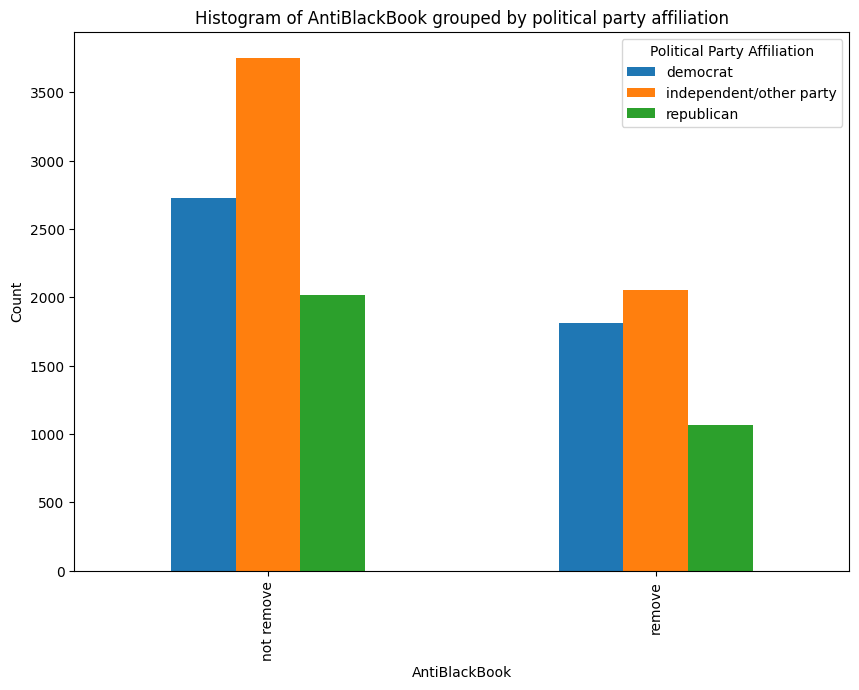

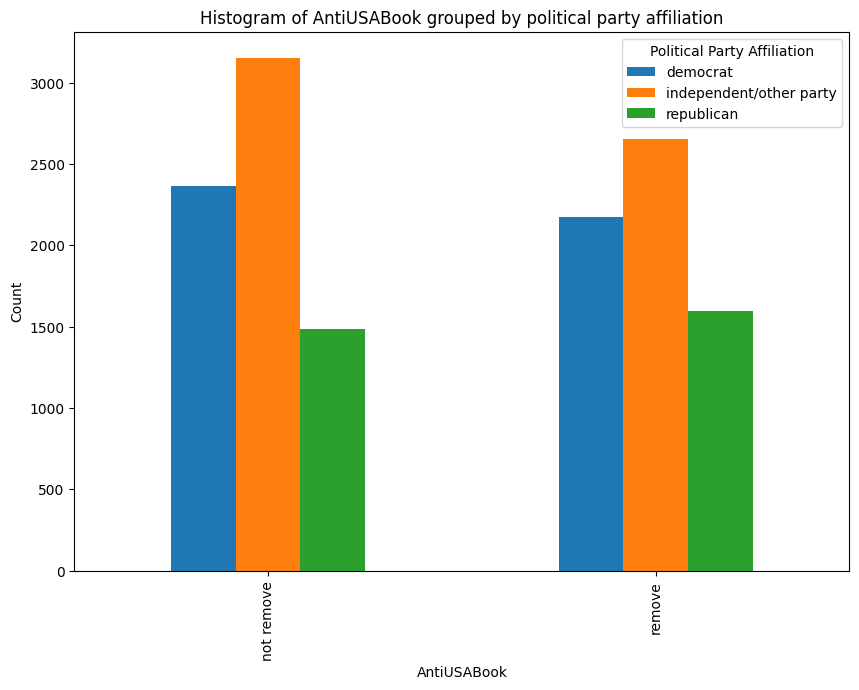

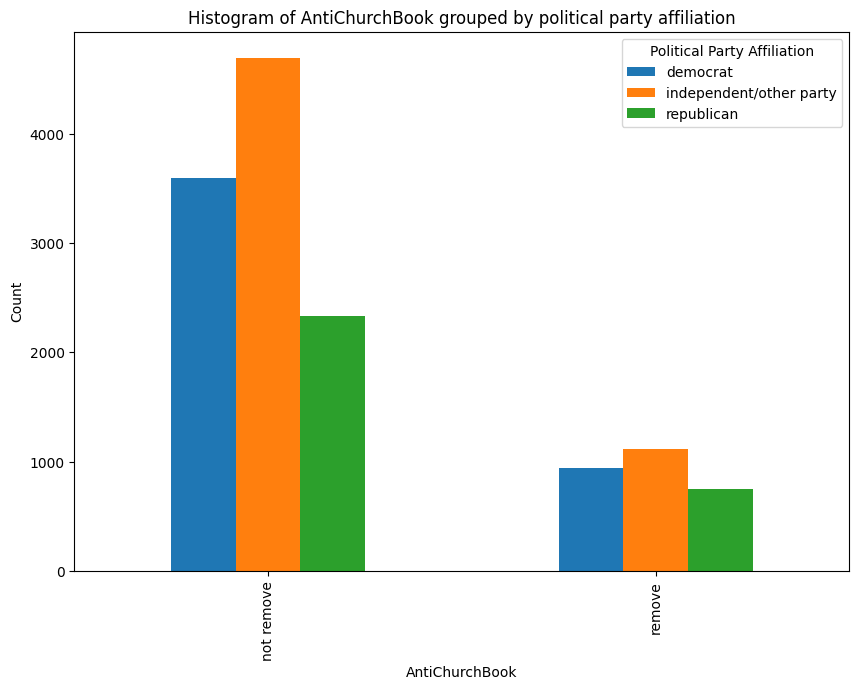

In [26]:
columns_to_plot = ['AntiBlackBook', 'AntiUSABook', 'AntiChurchBook']

for col in columns_to_plot:

    cross = pd.crosstab(org_party_church_race_religion[col], org_party_church_race_religion['party_grouped'])


    cross.plot(kind='bar', stacked=False, figsize=(10, 7))

    plt.title(f'Histogram of {col} grouped by political party affiliation')
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.legend(title='Political Party Affiliation')
    plt.show()

In [ ]:
columns_to_plot = ['AntiBlackBook', 'AntiUSABook', 'AntiChurchBook']

for col in columns_to_plot:

    cross = pd.crosstab(org_party_church_race_religion[col], org_party_church_race_religion['party_grouped'])


    cross.plot(kind='bar', stacked=False, figsize=(10, 7))

    plt.title(f'Histogram of {col} grouped by political party affiliation')
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.legend(title='Political Party Affiliation')
    plt.show()

In [29]:
org_party_church_race_religion.head()

,librac,libmslm,libath,partyid,year,party_grouped,AntiBlackBook,AntiUSABook,AntiChurchBook
51021,not remove,not remove,not remove,"independent (neither, no response)",2008,independent/other party,not remove,not remove,not remove
51023,remove,remove,remove,strong democrat,2008,democrat,remove,remove,remove
51024,remove,remove,remove,"independent, close to democrat",2008,independent/other party,remove,remove,remove
51026,not remove,remove,remove,"independent (neither, no response)",2008,independent/other party,not remove,remove,remove
51028,not remove,remove,not remove,"independent (neither, no response)",2008,independent/other party,not remove,remove,not remove


In [35]:
racist_books_df = org_party_church_race_religion[org_party_church_race_religion['AntiBlackBook'].isin(['remove', 'not remove'])]
anti_american_books_df = org_party_church_race_religion[org_party_church_race_religion['AntiUSABook'].isin(['remove', 'not remove'])]
anti_church_books_df = org_party_church_race_religion[org_party_church_race_religion['AntiChurchBook'].isin(['remove', 'not remove'])]


,librac,libmslm,libath,partyid,year,party_grouped,AntiBlackBook,AntiUSABook,AntiChurchBook
51021,not remove,not remove,not remove,"independent (neither, no response)",2008,independent/other party,not remove,not remove,not remove
51023,remove,remove,remove,strong democrat,2008,democrat,remove,remove,remove
51024,remove,remove,remove,"independent, close to democrat",2008,independent/other party,remove,remove,remove
51026,not remove,remove,remove,"independent (neither, no response)",2008,independent/other party,not remove,remove,remove
51028,not remove,remove,not remove,"independent (neither, no response)",2008,independent/other party,not remove,remove,not remove


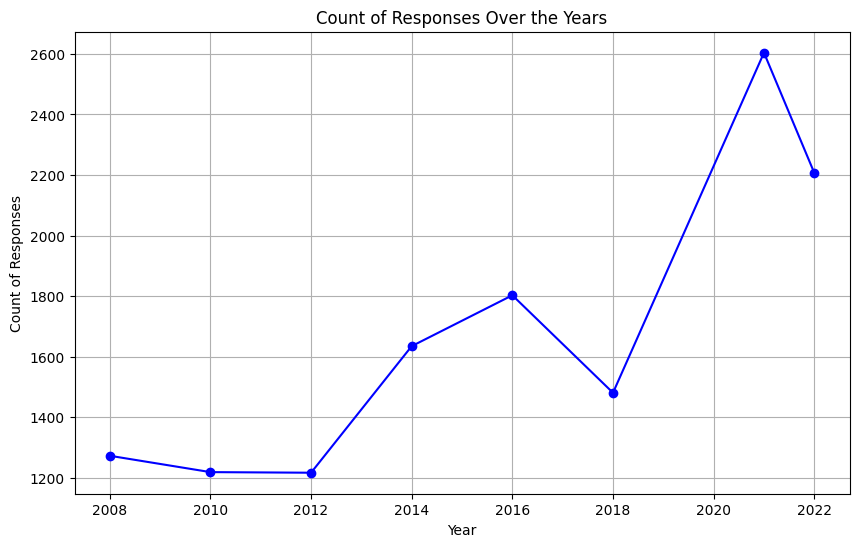

In [37]:
response_count = org_party_church_race_religion.groupby('year').size().reset_index(name='Count')

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(response_count['year'], response_count['Count'], marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Count of Responses')
plt.title('Count of Responses Over the Years')
plt.grid(True)

plt.show()






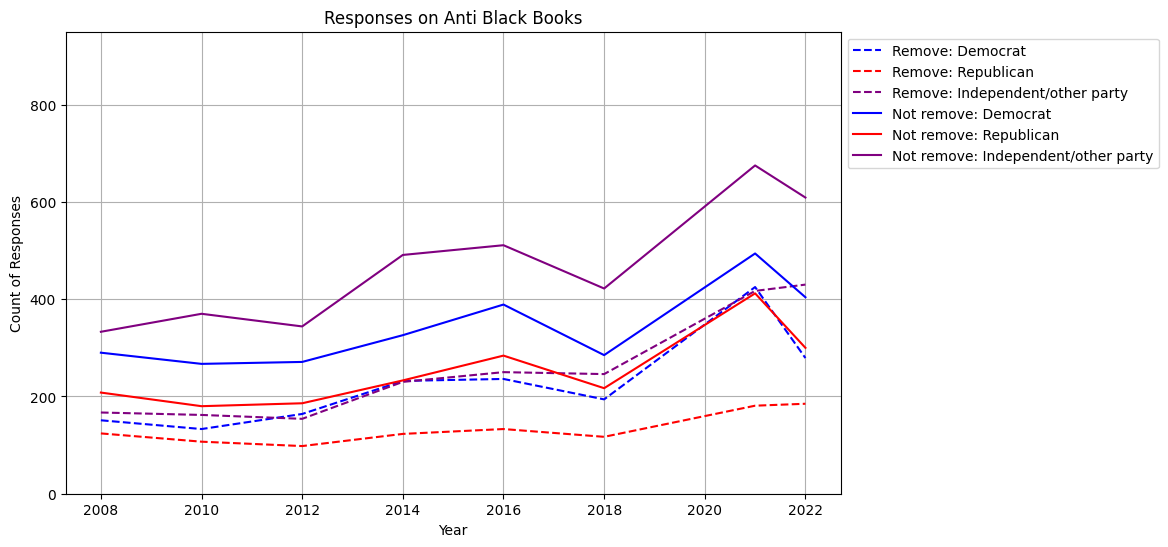

In [73]:
fig, ax = plt.subplots(figsize=(10, 6))

colors = {'democrat': 'blue', 'republican': 'red', 'independent/other party': 'purple'}
linestyles = {'remove': '--', 'not remove': '-'}

for opinion in ['remove', 'not remove']:
    for party in ['democrat', 'republican', 'independent/other party']:
        filtered_df = org_party_church_race_religion[(org_party_church_race_religion['AntiBlackBook'] == opinion) & (org_party_church_race_religion['party_grouped'] == party)]
        response_count = filtered_df.groupby('year').size().reset_index(name='Count')
        label = f'{opinion.capitalize()}: {party.capitalize()}'
        plt.plot(
            response_count['year'],
            response_count['Count'],
            label=label,
            color=colors[party],
            linestyle=linestyles[opinion]
        )
ax.set_ylim(0, 950)
plt.xlabel('Year')
plt.ylabel('Count of Responses')
plt.title('Responses on Anti Black Books')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

plt.show()

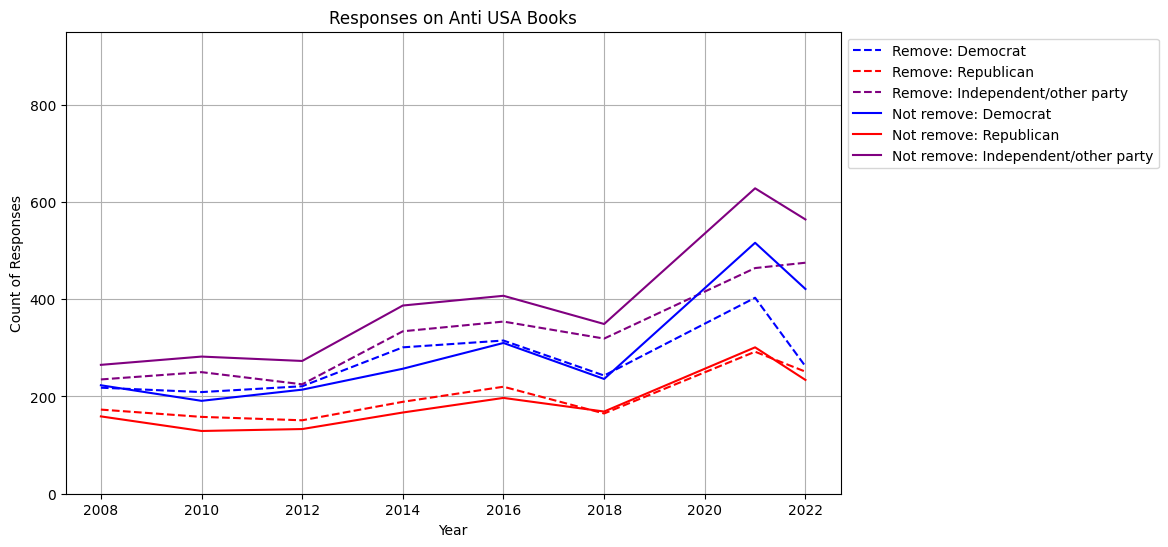

In [72]:
fig, ax = plt.subplots(figsize=(10, 6))

colors = {'democrat': 'blue', 'republican': 'red', 'independent/other party': 'purple'}
linestyles = {'remove': '--', 'not remove': '-'}

for opinion in ['remove', 'not remove']:
    for party in ['democrat', 'republican', 'independent/other party']:
        filtered_df = org_party_church_race_religion[(org_party_church_race_religion['AntiUSABook'] == opinion) & (org_party_church_race_religion['party_grouped'] == party)]
        response_count = filtered_df.groupby('year').size().reset_index(name='Count')
        label = f'{opinion.capitalize()}: {party.capitalize()}'
        plt.plot(
            response_count['year'],
            response_count['Count'],
            label=label,
            color=colors[party],
            linestyle=linestyles[opinion]
        )
ax.set_ylim(0, 950)
plt.xlabel('Year')
plt.ylabel('Count of Responses')
plt.title('Responses on Anti USA Books')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

plt.show()

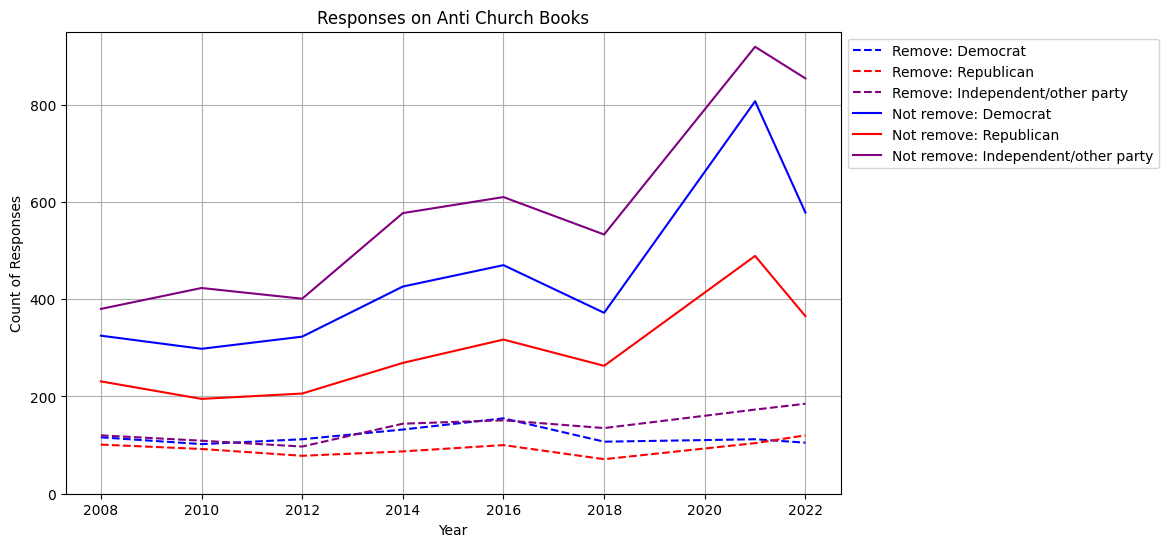

In [70]:
fig, ax = plt.subplots(figsize=(10, 6))

colors = {'democrat': 'blue', 'republican': 'red', 'independent/other party': 'purple'}
linestyles = {'remove': '--', 'not remove': '-'}

for opinion in ['remove', 'not remove']:
    for party in ['democrat', 'republican', 'independent/other party']:
        filtered_df = org_party_church_race_religion[(org_party_church_race_religion['AntiChurchBook'] == opinion) & (org_party_church_race_religion['party_grouped'] == party)]
        response_count = filtered_df.groupby('year').size().reset_index(name='Count')
        label = f'{opinion.capitalize()}: {party.capitalize()}'
        plt.plot(
            response_count['year'],
            response_count['Count'],
            label=label,
            color=colors[party],
            linestyle=linestyles[opinion]
        )
ax.set_ylim(0, 950)
plt.xlabel('Year')
plt.ylabel('Count of Responses')
plt.title('Responses on Anti Church Books')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

plt.show()